In [29]:
import pandas as pd
import numpy as np
import yaml
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Kernel-based ML methods
For both classification and regression problems it is often not possible to identify linear relationships in the data. In such cases, linear models cannot be successfully applied. One way to tackle this challenge is to employ the so-called kernel trick:
while still using a linear classifier/regressor, the data is transformed in a higher-dimensional space, in which it is hoped to find linear relationships more easily. The type of transformation is defined by the so-called kernel function $k(x,x_i)$ where $x$ is an individual feature vector and $x_i$ are feature vectors used for training. 

In this tutorial we look at Support Vector Machines (SVMs) for classification (Support Vector Classification, SVC) as well as regression (Support Vector Regression, SVR). Both methods will be compared to other ML methods, namely K-Nearest Neighbor Classification and another kernel-based method, Kernel Ridge Regression. For classification we look at the different types of steel and for regression we aim at predicting 

In addition we introduce the common "best practice" in data science and machine learning by separating the data in training, validation, and testing data and using cross validation to find the best hyperparameters.

Of course, we still work with our `steel-data` dataset:

## Classification

In the following, we aim at predicting the type of steel for a certain chemical concentration. Since we know the correct labels of our training data, this is called "supervised" machine learning.

We start with defining both the feature vetors in `X` (chemical compositions):

In [30]:
data = pd.DataFrame(yaml.load(open("steel-data.yaml"), Loader=yaml.Loader))
X = data[[col for col in data.columns if "c(" in col]]

Every steel composition in the dataset is a called a *feature vector* because it is represented as a vector in the so-called feature space. The task of the classification algorithm is to introduce hyper planes into this vector space, which clusters vectors having the same label and separates vectors having different labels (reminder: in our case, the label is the "type of steel" associated with a certain chemical composition). During the training, the distance between each feature vector and this hyper plane is maximized. The resulting wide and empty boundary between the different clusters will later ensure that vectors, which do not correspond to the training data will be classified successfully.

Obviously, for this we need the correct labels for the feature vectors:

In [31]:
df = pd.read_json("TypeOfSteel.json")
y = df['Numerical label']
y_classes, y_classes_counts = np.unique(df['Type of Steel'], return_counts = True)

### Support Vector Classification (SVC)

As a kernel-based ML method, SVCs employ the kernel trick: the feature space (also containing the training data) is transformed into a higher-dimensional space. In a space with sufficiently high dimensionality, also the most complex vector space may become linearly separable. For classification a separating hyper plane is then to be found so that different labels are most far away. Upon back transformation into the original feature space, the linear hyper plane becomes non-linear, probably even unsteady and not continuous.

This approach has two problems: the transformation into higher dimensions is computationally expensive and the visualization of the resulting hyper plane in the original feature space is very complex and practically not usable for explaining the classification. This is where we use the kernel trick. If the separating hyper plane is described using a kernel function, which describes the hyper plane in a higher dimensional space but is still tractable in lower dimensions, it is possible to use the (back) transformations without actually performing them. In the case of SVCs, the hyper plane is described using a set of training vectors, the so-called support vectors, hence the name of the technique.

Both linear and non-linear SVMs are adapted to the data at hand using certain hyperparameters, e.g. $C$ and $\alpha$. They allow the classifier to wrongly classify certain samples while penalizing every such false classification. On the one hand, this reduces the potential of overfitting. On the other hand, the required number of support vectors is reduced which increases prediction performance. The number of hyperparameters depends on the type of kernel.

Mathematically, the hyper plane is expressed by a sgn function and the hyperparameters by weights $\alpha_i$ associated with each training data point $i$. Per default, the a [radial distribution function](http://scikit-learn.org/stable/modules/metrics.html#rbf-kernel) (`rbf`) is used as kernel:

$y(x)=\textrm{sgn}\big(\sum_{i=1}^{N}\alpha_i y_i k_\textrm{rbf}(x,x_i)+b\big)$

where the `rbf` kernel function is 

$k_\textrm{rbf}(x, x_i)=\textrm{exp}(-\gamma\|x-x_i\|^2)$

This means, that the predicted class $y(x)$ for an arbitrary feature vector $x$ is ultimately calculated from the weighted (with $\alpha_i$) linear combination of all products between the training labels $y_i$ and the kernel functions of the training vectors $x_i$ and $x$. The weights $\alpha_i$ control the importance of a training data point and the kernel function determines the similarity between $x$ and $x_i$. The width $\gamma$ of the radial distribution function $k_{rbf}$ determines "how far away" two vectors are allowed to be for still being counted as "similar".

One speciality of SVCs is that it is not needed for the definition of the hyper plane to consider all training vectors. Vectors that are further away from the hyper plane and are visually screened by from the hyper plane by other vectors, do not influence location and orientation of the hyper plane. In other words, only vectors that are close to the hyper plane are needed to describe the plane mathematically exact. These closest vectors are hence called support vectors because of their "supporting" function.

This description is partially taken from [Wikipedia](https://de.wikipedia.org/wiki/Support_Vector_Machine), where even more details can be found about SVMs.

In `scikit-learn` we load the `SVC` class, as follows:

In [32]:
from sklearn.svm import SVC

All implementation deatils of the SVC algorithms in `scikit-learn` may be found [here](http://scikit-learn.org/stable/modules/svm.html#svm-classification). 

In the present example the classifier will seek to distinguish between seven steel types. In such cases, `scikit-learn` uses the so-called one-against one aproach for multi-class classification. If $m$ is the number of distinct classes, m(m-1)/2 classifiers are trained to each distinguish between two classes. Consequently, for each feature vector the probabilities for all classes are obtained and the final prediction is the class with the highest probability.

### K-Nearest Neighbors (KNN) classification
The nearest-neighbor classification is one of the simplest classification methods. The classification is done by comparing the classes of the $K$ nearest neighbors. Per default, the most frequent class among the neighbors is chosen and returned as prediction. To determine the neighborhood either the Euclidean norm or the [Manhattan distance](https://de.wikipedia.org/wiki/Manhattan-Metrik) is used.

Nearest-neighbor classification is implemented as [`KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) in `scikit-learn`:

In [33]:
from sklearn.neighbors import KNeighborsClassifier

### Comparison of both classification methods

In the following, SVC and KNN models are trained to predict the steel types based on their compositions:

In [34]:
# Definition and initializiation of the classifiers:
classifiers = [
    ('Support Vector Classifier', SVC(gamma=0.1)),
    ('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
]

# Here we will store the predictions and the scores of the different models:
predictions = {}
scores = {}

for i, (c_name, c) in enumerate(classifiers):
    
    # Fit and predict:
    c.fit(X, y)
    predictions[c_name] = c.predict(X)
    
    # Calculate and store the score:
    scores[c_name] = np.round(c.score(X,y),2)
    
    # Print out the resulting score:
    print(c_name, 'score:', scores[c_name])

Support Vector Classifier score: 0.85
K-Nearest Neighbors Classifier score: 0.75


As metric to compare the two classifiers the `score` is obtained as average success rate for the correct prediction of individual steel types (so-called "true positives"). For illustration, we now calculate the score manually. We also store how good each classifier predicts each class, i.e. the "true positives" per class.

In [35]:
# Here we store the percentage of true-positive classifications:
tp_classifier = {}

print('Percentage of correctly classified samples (true positives):')
# Element-wise comparison of predictions to target classes => "true positives" (tp):
for c_name, yp in predictions.items():
    
    yyp = np.array([True if k == l else False for k, l in zip(y, yp)])
    
    print('', c_name, ':', np.round(np.count_nonzero(yyp)/len(yyp), 2))
    
    tp_classifier[c_name] = []
    
    for class_no, class_label in enumerate(y_classes):
        tp_classifier[c_name].append(np.sum(yyp[np.where(y == class_no)[0]]) / y_classes_counts[class_no])

Percentage of correctly classified samples (true positives):
 Support Vector Classifier : 0.85
 K-Nearest Neighbors Classifier : 0.75


Zur besseren Übersichtlichkeit plotten wir die "true positives" jetzt noch für die beiden Klassifikatoren:

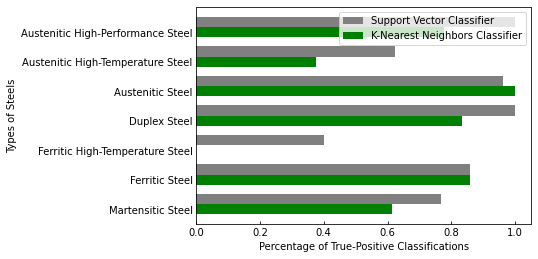

In [36]:
colors = ['grey', 'green']
for i, classifier in enumerate(classifiers):
    c_name, c = classifier
    plt.barh([j-0.35+i*0.35 for j in range(len(y_classes))], 
            width = tp_classifier[c_name], 
            height = 0.35, 
            label = c_name,
            color = colors[i])
    
ax = plt.gca()
ax.set_yticks([j for j in range(len(y_classes))])
ax.set_yticklabels(y_classes)
ax.invert_yaxis()
ax.tick_params(axis = 'x', direction = 'in')
ax.tick_params(axis = 'y', length = 0)
plt.ylabel('Types of Steels')
plt.xlabel('Percentage of True-Positive Classifications')
plt.legend()
plt.show()

In the present example, the `SVC` method performs more successfully on the data than the KNN method. This was epxected from the tutorial on scaling. In particular, the ferritic and martensitic steels are quite similar w.r.t their chemical composition and a linear separability or a classification purely based on a similarity metric (as in the case of a KNN model) is not very promising.

### Comparison of classification metrics for different scaling methods

In the tutorial on scaling different scaling methods were compared. Now we evaluate the effect of the different scaling methods on the results of the classification.

First, we load the YAML file with the scaled (and unscaled) data:

In [37]:
with open('scaled_data.yaml', 'r') as f:
    distributions = yaml.load(f, Loader=yaml.Loader)

Then, the models are trained and the aggregated results are displayed as DataFrame:

In [38]:
results = {'Classifier': [c[0] for c in classifiers]}
for d, X in distributions.items():
    results[d] = []
    for i, (c_name, c) in enumerate(classifiers):
        c.fit(X,y)
        yp = c.predict(X)
        results[d].append(np.round(c.score(X,y), 2))

df = pd.DataFrame(results)
display(df)

,Classifier,MinMaxScaler,RobustScaler,StandardScaler,Unscaled Data
0,Support Vector Classifier,0.40,0.9,0.88,0.85
1,K-Nearest Neighbors Classifier,0.85,0.8,0.84,0.75


Now we plot the differences in the metrics w.r.t the unscaled data as reference:

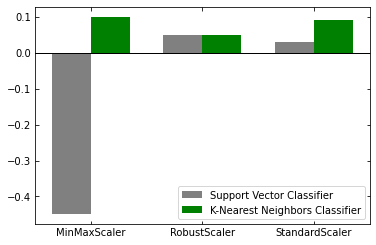

In [39]:
scaling_methods = [s for s in df.columns if s not in ['Classifier', 'Unscaled Data']]
x = np.arange(len(scaling_methods))
w = -0.35
ax = plt.gca()
for i, c_name in enumerate(df['Classifier']):
    if i == 1:
        w = -w
    diff = [df.loc[i, s] - df.loc[i, 'Unscaled Data'] for s in scaling_methods]
    ax.bar(x, diff, w, color = colors[i], label = c_name, align = 'edge')
    
ax.set_xlim(-0.5, 2.5)
ax.plot(ax.get_xlim(), [0,0], 'black', lw = 1)
ax.set_xticks([0,1,2])
ax.set_xticklabels(scaling_methods)
ax.tick_params(direction = 'in', top = True, right = True)
ax.legend()
plt.show()

In the present case, in five out of six cases the classification result yielded better results for scaled than for unscaled data. The `MinMaxScaler` produces the worst (for `SVC`) as well as the best result (for KNN). As the name already implies, the effect of the `RobustScaler` is similar for both classification algorithms. The `StandardScaler` mostly increases the performance of the KNN classifier.

To sum up: data scaling can make sense. However, the result does highly depend on the dataset and it can not be said *a priori* that one scaling methods works better than another one.

The result that with both the `MinMaxScaler` and the `StandardScaler` the results are quite good corresponds well with the purely qualitative observation obtained from the PCA in the previous tutorial. However, in the present case it applies to the KNN method to greater extend than to the SVC method.

For both classification methods, the default settings in `scikit-learn` were used. These defaults, however, do not need to be the best ones for the problem at hand. In the next section, we will see how the best set of these so-called hyperparameters is chosen.

### Optimal hyperparameters

As we know, SVMs have two important parameters, the penalty parameter $C$ and the kernel width $\gamma$. The larger the become, the less universal will the parametrized model be:
* $C$ determines the maximal slopes of hyper planes that separate the classes from each other. The smaller the value, the less sensitive the model reacts to deviations.
* $\gamma$ determines the width of the kernel function and thus how similar two feature vectors are. The smaller the value, the more similar are neighboring feature vectors. 
If $C$ and $\gamma$ are high, the danger of over-fitting is high as well. This means that only the training data is predicted with high accuracy. The transferability to new, unseen data points will be very limited.

To find the optimal set of hyperparameters, we vary both $C$ and $\gamma$ on a double-logarithmic grid:

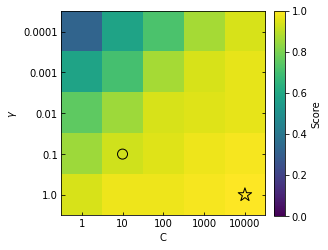

Best classification score found for hyperparameters gamma = 1.0 and C = 10000: 1.0


In [40]:
gamma_list = np.logspace(-4, 0, 5)
C_list = np.array(np.logspace(0, 4, 5), dtype = int)
scores = np.zeros((len(gamma_list),len(C_list)))

# Fit models for given hyperparameters:
for i, gamma in enumerate(gamma_list):
    for j, C in enumerate(C_list):
        svc = SVC(gamma = gamma, C = C)
        svc.fit(X, y)
        yp = c.predict(X)
        scores[i, j] = svc.score(X, y)
        
# Plot resulting scores with colorbar:
plt.matshow(scores, vmin = 0, vmax = 1.0)
cb = plt.colorbar(fraction = 0.046, pad = 0.04, label = 'Score')

# Plot default parameters for comparison:
idef = np.where(gamma_list == 0.1)[0]
jdef = np.where(C_list == 10)[0]
plt.scatter(jdef, idef, s = 100, marker = 'o', facecolors = 'none', edgecolors='black')

# Plot the maximum score:
imax, jmax = np.unravel_index(np.argmax(scores), scores.shape)
plt.scatter([jmax], [imax], s = 200, marker = '*', facecolors = 'none', edgecolors='black')

# Axis formatting:
ax = plt.gca()
ax.tick_params(direction = 'in', top = True, right = True)
ax.xaxis.tick_bottom()
ax.set_xlabel('C')
ax.set_xticks([n for n in range(len(C_list))])
ax.set_xticklabels(C_list)
ax.set_ylabel('$\gamma$')
ax.set_yticks([n for n in range(len(gamma_list))])
ax.set_yticklabels(gamma_list)

plt.show()
print(f"Best classification score found for hyperparameters gamma = {gamma_list[imax]} \
and C = {C_list[jmax]}: {np.round(np.max(scores), 2)}")

In the plot, two hyperparameter combination are highlighted:
* circle: the default values ($\gamma$ = 1/10 and $C$ = 10) and
* asterik: the optimal set of hyperparameters leading to the overall highest classification score ($\gamma$ = 1 and $C$= 10,000)
The score with the optimal set of hyperparameters is 1.0 meaning that 100% of predictions are correct. As noted before, the high values of hyperparameters and the score of 1.0 are clear indications that this model is largely overfitted and will poorly perform on new, unseen data. 

The best practice to reduce the risk of overfitting is to **never use the training score for the selection of hyperparameters**! Instead it is recommended to select the hyperparameters using *cross validation* (CV). We follow up on this in the next section.

### Cross validation (CV)
With n-fold cross validation, the data is split into n parts ("folds") containing each the same number of samples.
Next, the selected ML model (e.g. SVC) is trained with a certain combination of hyperparameters n times on (n-1) parts of the data (the training data) and validated on the remaining 1/n of the data (the validation data set).
The score, which is the used to select the hyperparameters, is determined as the average score on the n validation sets.

The complete CV algorithm is implemented in `scikit-learn` as the utility function `cross_val_score`. We will see how to use this now: 

In [41]:
from sklearn.model_selection import cross_val_score

In the following, we repeat the search for optimal hyperparameters. Instead of training on the whole dataset as before, we now use 5-fold cross validation to determine the score of the ML model. This means that we train on 64 samples (4/5 = 80% of the whole data) and determine the score on the remaining 16 samples (1/5 = 20 % of the whole data). For our dataset, n=5 is chosen so that the number of training data points is sufficiently high but there are still enough validation data points to cover all seven classes.

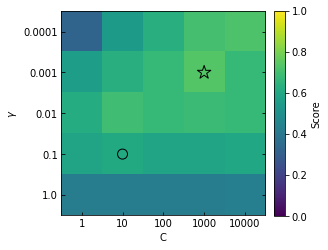

Best score with fivefold cross validation for hyperparameters gamma = 0.001 and C = 1000: 0.73


In [42]:
scores = np.zeros((len(gamma_list),len(C_list)))

# Fit models for given hyperparameters:
for i, gamma in enumerate(gamma_list):
    for j, C in enumerate(C_list):
        svc = SVC(gamma = gamma, C = C)
        svc.fit(X, y)
        
        # Take the mean of the cross validation scores: 
        scores[i, j] = np.mean(cross_val_score(svc, X, y, cv = 5))

# Plot resulting scores with colorbar:
plt.matshow(scores, vmin = 0, vmax = 1.0)
cb = plt.colorbar(fraction = 0.046, pad = 0.04, label = 'Score')

# Plot default parameters for comparison:
idef, jdef = np.where(gamma_list == 0.1)[0], np.where(C_list == 10)[0]
plt.scatter(jdef, idef, s = 100, marker = 'o', facecolors = 'none', edgecolors='black')

# Plot the maximum score:
imax, jmax = np.unravel_index(np.argmax(scores), scores.shape)
plt.scatter([jmax], [imax], s = 200, marker = '*', facecolors = 'none', edgecolors='black')

# Axis formatting:
ax = plt.gca()
ax.tick_params(direction = 'in', top = True, right = True)
ax.xaxis.tick_bottom()
ax.set_xlabel('C')
ax.set_xticks([n for n in range(len(C_list))])
ax.set_xticklabels(C_list)
ax.set_ylabel('$\gamma$')
ax.set_yticks([n for n in range(len(gamma_list))])
ax.set_yticklabels(gamma_list)

plt.show()
print(f'Best score with fivefold cross validation for hyperparameters gamma = {gamma_list[imax]} and C = {C_list[jmax]}: {np.round(np.max(scores), 2)}')

Obviously, with CV a score of 1.0 is not reachable anymore. This, of course, is much more realistic. Interestingly, the obtained CV score of 0.73 is not too far away from the score of 0.85 as obtained with the default parameters on the whole dataset. The CV score for this set of parameters is, however:

In [43]:
print(np.round(scores[idef, jdef], 2)[0])

0.61


which is, of course, much worse than for the optimal set of hyperparameters.

Finally, it should be noted that SVCs have - next to $C$ and $\gamma$ other, non-continuous, hyperparameters, e.g. the kernel type or the exponent of polynominal kernels. In the present case, we have used the default `rbf` kernel.

If course, CV can also be applied in the same way to the kNN model. In this case, the hyperparameters `leaf_size` and `n_neighbors` are varied:

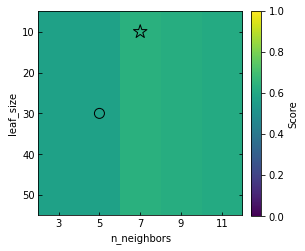

Best score with CV for hyperparameters leaf_size = 10 and n_neighbors = 7: 0.63


In [44]:
leaf_size_list = np.array([10, 20, 30, 40, 50])
n_neighbors_list = np.array([3, 5, 7, 9, 11])
scores = np.zeros((len(leaf_size_list),len(n_neighbors_list)))

# Fit models for given hyperparameters:
for i, leaf_size in enumerate(leaf_size_list):
    for j, n_neighbors in enumerate(n_neighbors_list):
        knn = KNeighborsClassifier(leaf_size=leaf_size, n_neighbors=n_neighbors)
        knn.fit(X, y)
        
        # Take the mean of the cross validation scores: 
        scores[i, j] = np.mean(cross_val_score(knn, X, y, cv = 5))

# Plot resulting scores with colorbar:
plt.matshow(scores, vmin = 0, vmax = 1.0)
cb = plt.colorbar(fraction = 0.046, pad = 0.04, label = 'Score')

# Plot default parameters for comparison:
idef, jdef = np.where(leaf_size_list == 30)[0], np.where(n_neighbors_list == 5)[0]
plt.scatter(jdef, idef, s = 100, marker = 'o', facecolors = 'none', edgecolors='black')

# Plot the maximum score:
imax, jmax = np.unravel_index(np.argmax(scores), scores.shape)
plt.scatter([jmax], [imax], s = 200, marker = '*', facecolors = 'none', edgecolors='black')

# Axis formatting:
ax = plt.gca()
ax.tick_params(direction = 'in', top = True, right = True)
ax.xaxis.tick_bottom()
ax.set_xlabel('n_neighbors')
ax.set_xticks([n for n in range(len(n_neighbors_list))])
ax.set_xticklabels(n_neighbors_list)
ax.set_ylabel('leaf_size')
ax.set_yticks([n for n in range(len(leaf_size_list))])
ax.set_yticklabels(leaf_size_list)

plt.show()
print(f'Best score with CV for hyperparameters leaf_size = {leaf_size_list[imax]} \
and n_neighbors = {n_neighbors_list[jmax]}: {np.round(np.max(scores), 2)}')

Also in this case, the CV score with optimal hyperparameters is approx. 0.1 worse than the score determined without CV with default parameters. In comparison to the SVC, the kNN algorithm appears less sensitive to the choice of hyperparameters so that the CV score for the default hyperparameters (`leaf_size=30`, `n_neighbors=5`) is only slightly worse than for the optimal parameter set:

In [45]:
print(np.round(scores[idef, jdef], 2)[0])

0.57


The so-obtained CV scores make it possible to select the optimal set of hyperparameters for a given ML model. This, however, does not permit a statement about how good the model will perform on new, unseen data. Intuitively, one may assume that this information is already included in the CV score due to the distinction between training and validation set. However, the data from the validation sets were already used to determine the optimal hyperparameters. The CV score therefore only ensures that the chosen hyperparameters perform best on the validation set(s). This is no answer to the question how good it will perform on _really_ unseen data!

The following section will explain how this question can be addressed.

### Split into train (CV) data and test data

For the reasons mentioned above, it is best practice in ML model developemnt to split the whole data into training and testing data and only use the training data for CV. The so-obtained model is then tested for transferability to new, unseen data on the test data set. Commonly, the size of the test set should be between 10 and 30 %. Here, we chose 15 % because the dataset only contains a limited number of samples:

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
print(f'Number of samples in training data set: {len(X_train)}') 
print(f'Number of samples in testing data set: {len(X_test)}')

Number of samples in training data set: 68
Number of samples in testing data set: 13


In addition, `scikit-learn` offers a helpful utility function called `GridSearchCV`. It is used for the search for the optimal set of hyperparameters instead of our self-implemented code above. Instead of `cv=5` we use now `cv=3` to yield suffiently many samples in the validation sets:

In [47]:
from sklearn.model_selection import GridSearchCV
cgs = GridSearchCV(estimator=SVC(), param_grid=dict(C=C_list, gamma=gamma_list), n_jobs=-1, cv=3)

Now we train the models and determine the optimal set of hyperparameters, for which the CV score is highest: 

In [48]:
cgs.fit(X_train, y_train)
print(f'Best CV-Score (= {np.round(cgs.best_score_, 2)}) on training data (N_train = {len(X_train)}) \
for the SVC hyperparameters gamma = {cgs.best_estimator_.gamma} and C = {cgs.best_estimator_.C})')

Best CV-Score (= 0.81) on training data (N_train = 68) for the SVC hyperparameters gamma = 0.0001 and C = 10000)


With this set of hyperparameters we are now predicting the labels of the test data set and determine the respective score:

In [49]:
print('Score on the testing data (best hyperparameters, determined using CV on 85 % of the whole data set):', 
      np.round(cgs.best_estimator_.score(X_test, y_test), 2) )

Score on the testing data (best hyperparameters, determined using CV on 85 % of the whole data set): 0.85


This score is even higher than the CV score, which makes optimistic that the trained model will deliver reasonable results on new, unseen data.

For comparison, the test score for the optimal set of hyperparameters without separation in training and testing data is, as follows:

In [50]:
svc = SVC(C=1000, gamma=0.001)
svc.fit(X_train, y_train)
print('Score on the  den testing data (best hyperparameters, determined using CV on the whole data set):', 
      np.round(svc.score(X_test, y_test), 2))

Score on the  den testing data (best hyperparameters, determined using CV on the whole data set): 0.85


Interestingly, we obtain the same score as with the model trained on 85 % of the data using CV. This, of course, is only coincidental. And, please note, that in this case the test data has been used two times: during the determination of the optimal set of parameters _and_ for determining the test score.

The score with with the default parameter set ($C$ = 10 und $\gamma$ = 0.1) is worse:

In [51]:
svc = SVC(gamma=0.1)
svc.fit(X_train, y_train)
print('Score on the training data (default hyperparameters):', np.round(svc.score(X_test, y_test), 2))

Score on the training data (default hyperparameters): 0.77


## Regression

Now we move towards kenel-based _regression_ methods.

### Support Vector Regression (SVR)
SVR works similar to SVC. The main difference is that no sgn function is used and that the training labels $y_i$ are replaced by weights $w_i=\alpha_i y_i$ where $y_i$ are the target values to learn. Implementation details can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). A [comparison](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html) of the different kernel functions can also be found.

### Kernel Ridge Regression (KRR)
KRR combines regression with the method of least squares and [L2 norm](https://de.wikipedia.org/wiki/Euklidische_Norm) regularisation (this method is called "ridge regression") with the kernel trick. Simply speaking, the method of least squares is used to minimize the error between the learned function and the training values while the regularisation is used to prevent the learned function from "wildly" oscillating between the training values. Regularisation is a prevention measure against over-fitting. Details can be found e.g. [here](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/). Implementation details can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge).

### Comparison of regression methods
A comparison between the learning methods is provided [here](http://scikit-learn.org/stable/modules/kernel_ridge.html) through the `scikit-learn` community. 

We will now focus on predicting some mechanical properties using SVR and KRR. For comparison, we also provide results obtained with a non-linear, neural-network based, regression method called [Multilayer Perceptron Regressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html).

Of course, we use apply all the best practices learned so far. I.e., we start with separating training and testing data set and use `GridSearchCV` to find the optimal set of hyperparameters. As evaluation metric we use the [mean absolute error](https://de.wikipedia.org/wiki/Mittlerer_absoluter_Fehler) (MAE) and the [Pearson correlation coefficient](https://de.wikipedia.org/wiki/Korrelationskoeffizient) ($\rho$).

In [52]:
# Import the scikit-learn classes to be used for regression:
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor

# Import the metrics:
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error

# Define the parameters for the grid search:
C_list = np.logspace(-1,5,7)
gamma_list = np.logspace(-3,0,4)
alpha_list = np.logspace(-6,1,8)

# Define the regressors to be used via the GridSearchCV interface:
regressors = [
    ('Support Vector Regression', GridSearchCV(estimator=SVR(epsilon=1), n_jobs=-1, cv=3,
                                               param_grid=dict(C=C_list, gamma=gamma_list))
    ),
    ('Kernel Ridge Regression', GridSearchCV(estimator=KernelRidge(kernel='laplacian'), cv=3, 
                                             param_grid=dict(gamma=gamma_list, alpha=alpha_list)),
    ),
    ('Multi-layer Perceptron', GridSearchCV(estimator=MLPRegressor(solver = 'lbfgs', random_state = 0, 
                                                                   max_iter=2e4),
                                         param_grid=dict(hidden_layer_sizes=[(30,), (60,), (90,)],
                                                        alpha=alpha_list)))        
]

For simplicity, we limit the analysis to the data scaled with the `RobustScaler` (in the hope that the resulting ML model will indeed be "robust"). The properties, we aimt at predicting, are the elongation at fracture A (%), the yield strength, and the ultimate tensile stress (both in MPa). 

In [53]:
# Let's use the scaled concentrations as feature matrix:
concentrations = pd.DataFrame(distributions['RobustScaler'])

# Let's use try to predict fracture strain, yield strength, and ultimate tensile strength:
properties = pd.DataFrame(data[["A (%)", "Rp0.2 (MPa)", "Rm (MPa)"]])

As for the classification, we will now train ML models for the three properties, select the best set of parameters using `GridSearchCV`, and plot the predictions on the training and testing data (this can take several minutes):

Building models for A (%):
... using Support Vector Regression
... using Kernel Ridge Regression
... using Multi-layer Perceptron
Building models for Rp0.2 (MPa):
... using Support Vector Regression
... using Kernel Ridge Regression
... using Multi-layer Perceptron
Building models for Rm (MPa):
... using Support Vector Regression
... using Kernel Ridge Regression
... using Multi-layer Perceptron


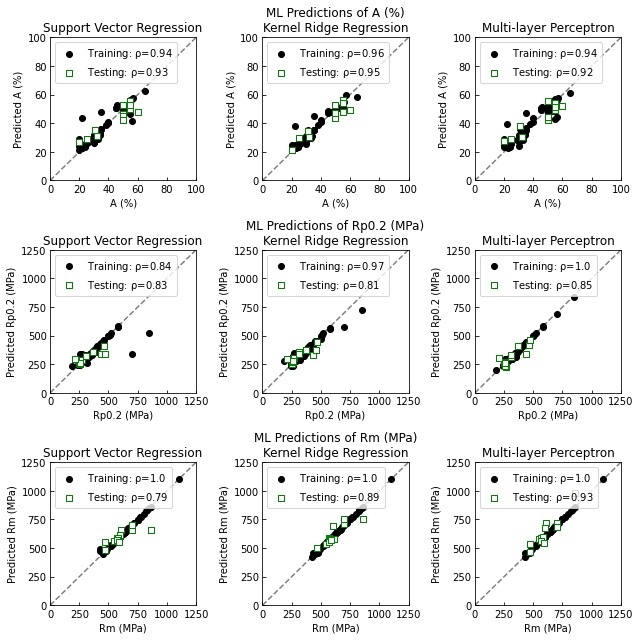

In [54]:
# We will store the results as (ordered) dictionaries in the following list:
from collections import OrderedDict
results = []

# Make a beautiful plot:
fig, axes = plt.subplots(3, 3, figsize = (9,9))
    
# Loop over the properties to be predicted:
for j, (p, y) in enumerate(properties.items()):
    
    print(f"Building models for {p}:")
    
    # Drop NaN values in both arrays:
    y = y.dropna()
    X = concentrations.iloc[y.index]

    # Split data into training and test data:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)   
 
    # Loop over the regressors:
    for i, (r_name, regressor) in enumerate(regressors):      
            
        print(f"... using {r_name}")
        
        # Do the grid search:
        regressor.fit(X_train, y_train)
        
        # Get the predictions for the training and the test data:
        yp_train = regressor.predict(X_train)
        yp_test = regressor.predict(X_test)

        # Store results in dictionary:
        results.append(OrderedDict({
            'Regressor': r_name, 'Property': p, 'N_train': len(X_train), 'N_test': len(X_test),  
            'Rho (train)': round(pearsonr(y_train, yp_train)[0],2),
            'Rho (test)': round(pearsonr(y_test, yp_test)[0],2),
            'MAE (train)': round(mean_absolute_error(y_train, yp_train),1),
            'MAE (test)': round(mean_absolute_error(y_test, yp_test),1)
        }))
        results[-1].update(regressor.best_params_)
        
        # Make a nice plot that compares the predictions (y-axis) to the input data (x-axis):
        
        if 'MPa' in p:
            lim = (0, 1250)
        else:
            lim = (0, 100)
        
        ax = axes[j,i]
        ax.plot(lim, lim, '--', c = 'grey', zorder = 0)
        ax.scatter(y_train, yp_train, c = 'black', 
                   label = r'Training: $\mathregular{\rho}$='+str(results[-1]['Rho (train)']))
        ax.scatter(y_test, yp_test, marker= 's', edgecolors = 'green', 
                   label = r'Testing: $\mathregular{\rho}$='+str(results[-1]['Rho (test)']), c = 'white')
        ax.set_xlabel(p)
        ax.set_ylabel('Predicted '+p)
        ax.set_xlim(lim)
        ax.set_ylim(lim)
        ax.tick_params(direction = 'in')
        ax.locator_params(nbins = 5)
        if i == 1:
            ax.set_title('ML Predictions of ' + p + '\n' + r_name)
        else:
            ax.set_title(r_name)
        ax.legend(loc = 'upper left')
        
plt.tight_layout()
plt.show()

The exact numbers and optimal hyperparameters can be found in the following table:

In [55]:
# Convert the dictionary with the results to a DataFrame:
df = pd.DataFrame.from_records(results)
display(df)

,Regressor,Property,N_train,N_test,Rho (train),Rho (test),MAE (train),MAE (test),C,gamma,alpha,hidden_layer_sizes
0,Support Vector Regression,A (%),66,12,0.94,0.93,2.7,4.6,100.0,0.100,NaN,NaN
1,Kernel Ridge Regression,A (%),66,12,0.96,0.95,2.3,3.9,NaN,0.001,0.001000,NaN
2,Multi-layer Perceptron,A (%),66,12,0.94,0.92,3.1,5.3,NaN,NaN,10.000000,"(60,)"
3,Support Vector Regression,Rp0.2 (MPa),66,12,0.84,0.83,19.9,37.5,1000.0,0.100,NaN,NaN
4,Kernel Ridge Regression,Rp0.2 (MPa),66,12,0.97,0.81,17.8,39.9,NaN,0.010,0.010000,NaN
5,Multi-layer Perceptron,Rp0.2 (MPa),66,12,1.00,0.85,6.5,33.1,NaN,NaN,10.000000,"(30,)"
6,Support Vector Regression,Rm (MPa),66,12,1.00,0.79,2.7,40.9,10000.0,1.000,NaN,NaN
7,Kernel Ridge Regression,Rm (MPa),66,12,1.00,0.89,0.7,34.5,NaN,0.010,0.000001,NaN
8,Multi-layer Perceptron,Rm (MPa),66,12,1.00,0.93,0.8,44.4,NaN,NaN,0.000001,"(90,)"


Without going into too much details here, one has to state that the predictions are suprisingly good. Especially, when considering 
* that only the chemical composition is used for prediction and 
* that only 66 samples were used for training.

All in all, the best predictions **on the test data** are on average: 

In [56]:
for p in df.Property.unique():
    print(f"...for {p.split()[0]} better than {round(np.min(df[df.Property == p]['MAE (test)']))} {p.split()[-1]}")

...for A better than 4 (%)
...for Rp0.2 better than 33 (MPa)
...for Rm better than 34 (MPa)


Finally it is noted that the individual test predictions will vary if the `random_split` used in `train_test_split` is changed. This problem can only be overcome by more data or by non-randomly splitting the data.